# 设置

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

# 导入

In [2]:
train_data=pd.read_csv("./train.csv")#默认索引为开头
train_data.head(10)

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,12531_23,T,T_3,134.0,23.0,offline,intermediate,12531.0,F,High School Diploma,1.0,29.0,4.0,N,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
7,8129_61,U,U_1,134.0,NaN,online,easy,8129.0,M,Matriculation,2.0,45.0,1.0,N,1.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
9,17019_153,Y,Y_1,136.0,153.0,offline,hard,17019.0,M,Bachelors,3.0,28.0,2.0,N,4.0,1


# 数据清洗

<AxesSubplot:>

id_num                       False
program_type                  True
program_id                    True
program_duration              True
test_id                       True
test_type                     True
difficulty_level              True
trainee_id                    True
gender                        True
education                     True
city_tier                     True
age                           True
total_programs_enrolled       True
is_handicapped                True
trainee_engagement_rating     True
is_pass                      False
dtype: bool

id_num                           0
program_type                   731
program_id                     699
program_duration               675
test_id                        725
test_type                      702
difficulty_level               703
trainee_id                     739
gender                         707
education                      702
city_tier                      700
age                          19379
total_programs_enrolled        692
is_handicapped                 718
trainee_engagement_rating      772
is_pass                          0
dtype: int64

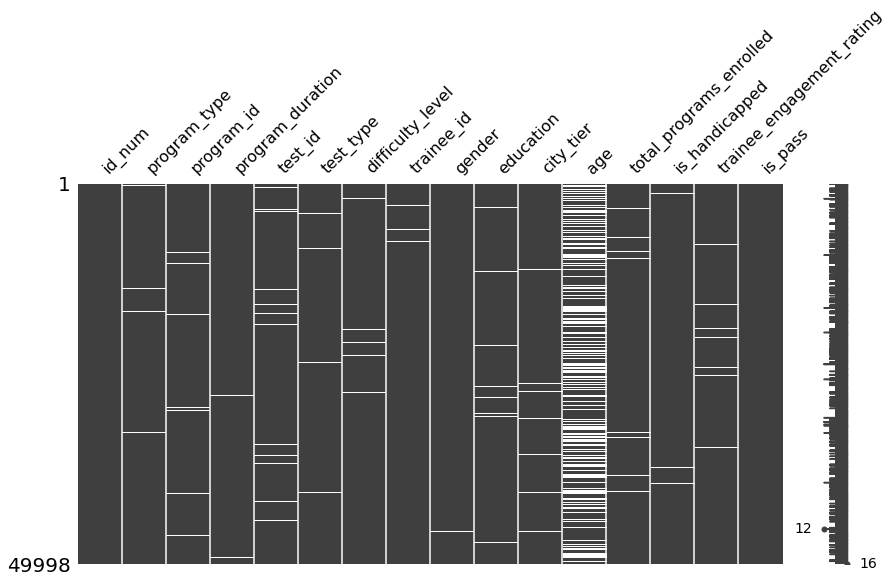

In [3]:
train_data=pd.read_csv("./train.csv") #读入数据

msno.matrix(train_data,figsize=(14,7)) #查看缺失值

train_data.isnull().any()

train_data.isnull().sum()

In [4]:
train_data=train_data.dropna(inplace=False,axis=0,
subset=["education","difficulty_level","city_tier", "gender"]) #将数据清洗

train_data['age'].fillna(train_data['age'].mean(),inplace=True)#还是觉得age这样处理不好

# 数据分析

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,46605.000000,46572.000000,46550.000000,47252.000000,47252.000000,46592.000000,46526.000000,47252.000000
mean,128.230104,91.340097,9868.933276,2.248370,36.513944,2.585036,2.396058,0.694870
std,6.889462,51.278007,5719.269476,1.011198,7.077766,1.243153,1.326462,0.460467
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.250000,1.000000,31.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9679.000000,2.000000,36.513944,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14621.000000,3.000000,43.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47252 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     47252 non-null  object 
 1   program_type               46560 non-null  object 
 2   program_id                 46579 non-null  object 
 3   program_duration           46605 non-null  float64
 4   test_id                    46572 non-null  float64
 5   test_type                  46597 non-null  object 
 6   difficulty_level           47252 non-null  object 
 7   trainee_id                 46550 non-null  float64
 8   gender                     47252 non-null  object 
 9   education                  47252 non-null  object 
 10  city_tier                  47252 non-null  float64
 11  age                        47252 non-null  float64
 12  total_programs_enrolled    46592 non-null  float64
 13  is_handicapped             46574 non-null  obj

<AxesSubplot:>

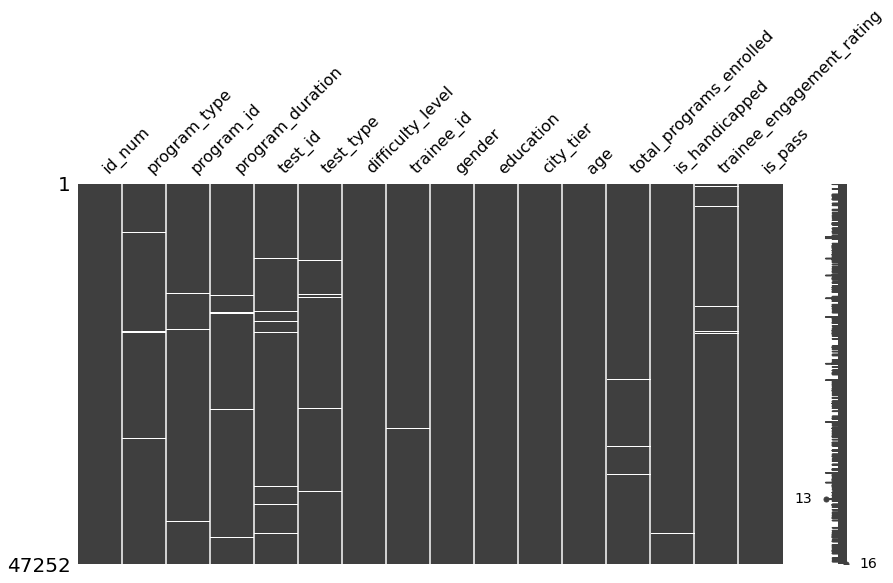

In [5]:
train_data.describe() #描述总体数据
train_data.info() #描述每列的摘要

msno.matrix(train_data,figsize=(14,7))
#print(train_data['age'].unique())
#print (train_data['age'].mean)

In [6]:
print(train_data['gender'].unique())
print(train_data['education'].unique())
print(train_data['city_tier'].unique())
print(train_data['difficulty_level'].unique())

['M' 'F']
['Matriculation' 'High School Diploma' 'Bachelors' 'Masters'
 'No Qualification']
[3. 4. 1. 2.]
['intermediate' 'easy' 'hard' 'vary hard']


In [7]:
train_data.loc[train_data['gender'] == 'M', 'gender'] = 1 # 将gender中的“M”“F”转换成值
train_data.loc[train_data['gender'] == 'F', 'gender'] = 5

train_data.loc[train_data['education'] == 'Matriculation', 'education'] = 6 # 将edu中的学历转换成值
train_data.loc[train_data['education'] == 'High School Diploma', 'education'] = 8 
train_data.loc[train_data['education'] == 'Bachelors', 'education'] = 10 
train_data.loc[train_data['education'] == 'Masters', 'education'] = 15 
train_data.loc[train_data['education'] == 'No Qualification', 'education'] = 3 

train_data.loc[train_data['difficulty_level'] == 'easy', 'difficulty_level'] = 0 #同样的，将level转换
train_data.loc[train_data['difficulty_level'] == 'intermediate', 'difficulty_level'] = 2
train_data.loc[train_data['difficulty_level'] == 'hard', 'difficulty_level'] = 4
train_data.loc[train_data['difficulty_level'] == 'vary hard', 'difficulty_level'] = 6

train_data['city_tier']=train_data['city_tier'].fillna(train_data['city_tier'].mean())

print(train_data['gender'].unique())
print(train_data['difficulty_level'].unique())
print(train_data['education'].unique())
print(train_data['city_tier'].unique())

'''train_data.loc[train_data['program_type'] == 'Y', 'program_type'] = 1
train_data.loc[train_data['program_type'] == 'T', 'program_type'] = 2
train_data.loc[train_data['program_type'] == 'Z', 'program_type'] = 3
train_data.loc[train_data['program_type'] == 'V', 'program_type'] = 4
train_data.loc[train_data['program_type'] == 'U', 'program_type'] = 5
train_data.loc[train_data['program_type'] == 'X', 'program_type'] = 6
train_data.loc[train_data['program_type'] == 'S', 'program_type'] = 7'''


[1 5]
[2 0 4 6]
[6 8 10 15 3]
[3. 4. 1. 2.]


"train_data.loc[train_data['program_type'] == 'Y', 'program_type'] = 1\ntrain_data.loc[train_data['program_type'] == 'T', 'program_type'] = 2\ntrain_data.loc[train_data['program_type'] == 'Z', 'program_type'] = 3\ntrain_data.loc[train_data['program_type'] == 'V', 'program_type'] = 4\ntrain_data.loc[train_data['program_type'] == 'U', 'program_type'] = 5\ntrain_data.loc[train_data['program_type'] == 'X', 'program_type'] = 6\ntrain_data.loc[train_data['program_type'] == 'S', 'program_type'] = 7"

# 处理特征数据

In [8]:

'''difficulty_level、gender，education，age，city_tier'''
train_data['education']=train_data['education']-train_data['city_tier']

'''#处理age
edu_age=[]
train_data.loc[train_data['difficulty_level'] == 'vary hard', 'difficulty_level'] = 6
age_else=train_data[train_data['age'].notnull()]#age_else是把所有age为有数的列集合
print(age_else)
train_data.loc[train_data['age']==None,'age']=1
#train_data['age']=train_data['age'].fillna(train_data['age'].mean())#还是觉得age这样处理不好
train_data['age'].isnull()'''


'difficulty_level、gender，education，age，city_tier'

"#处理age\nedu_age=[]\ntrain_data.loc[train_data['difficulty_level'] == 'vary hard', 'difficulty_level'] = 6\nage_else=train_data[train_data['age'].notnull()]#age_else是把所有age为有数的列集合\nprint(age_else)\ntrain_data.loc[train_data['age']==None,'age']=1\n#train_data['age']=train_data['age'].fillna(train_data['age'].mean())#还是觉得age这样处理不好\ntrain_data['age'].isnull()"

# 开始线性回归，并进行评估

In [9]:
from sklearn.linear_model import LinearRegression # 导入线性回归的类
from sklearn.model_selection import KFold # 交叉验证

predictors = [ "difficulty_level","education","gender"] # 输入机器学习算法的特征
#predictors = [ "difficulty_level", "gender", "education", "age","total_programs_enrolled"] # 输入机器学习算法的特征
#predictors = ["difficulty_level", "gender", "education", "age", "city_tier","total_programs_enrolled", "trainee_engagement_rating"] # 输入机器学习算法的特征
alg = LinearRegression() # 建立线性回归类
alg1=alg
predictions=LinearRegression()
kf = KFold(n_splits=3,random_state=2,shuffle=True) # KFold类实例化

#predictions = []
MaxNum=0#最大拟合数

# 建立一个回归对象,因为分了三份，所以train有2/3,test有1/3
for train, test in kf.split(train_data):
    print("\n\n\n")
    
    train_predictors = (train_data[predictors].iloc[train,:]) # train行，获得训练集的特征
    train_target = train_data["is_pass"].iloc[train] # 获取到数据集中交叉分类好的标签，训练集的target
    print(train_predictors) 
    print(train_target)
    
    alg.fit(train_predictors, train_target) # 通过特征和target获得训练模型
    print(train_data[predictors].iloc[test,:])
    
    test_predictions = alg.predict(train_data[predictors].iloc[test,:]) # 获得测试数据
    test_target=train_data["is_pass"].iloc[test]# 获得测试用的目标值
    
    test_predictions[test_predictions>0.5]=1 #与test_target格式相同
    test_predictions[test_predictions<=0.5]=0
    
    print(test_predictions)
    print(test_target)
    print(sum(test_predictions==test_target))
    
    if (sum(test_predictions==test_target)>MaxNum):
        alg1=alg
    
alg=alg1
print (alg.score(train_data[predictors],train_data['is_pass']))
       # redictions.save(alg)#记录最好的一个模型
    
    #print (test_predictions)
    #print("\n\n")
    #predictions.append(test_predictions)





      difficulty_level education gender
1                    0       4.0      5
3                    0       3.0      5
4                    2       7.0      5
5                    2       7.0      5
6                    0       8.0      1
...                ...       ...    ...
49986                0       5.0      5
49989                0       2.0      5
49990                0       6.0      5
49992                0       2.0      5
49996                2       3.0      1

[31501 rows x 3 columns]
1        1
3        1
4        1
5        0
6        1
        ..
49986    1
49989    1
49990    1
49992    1
49996    1
Name: is_pass, Length: 31501, dtype: int64


LinearRegression()

      difficulty_level education gender
0                    2       3.0      1
2                    0       5.0      1
8                    0       2.0      1
11                   0       4.0      5
13                   2       3.0      1
...                ...       ...    ...
49991                0       6.0      1
49993                4       6.0      5
49994                2       5.0      5
49995                0       6.0      5
49997                4       4.0      1

[15751 rows x 3 columns]
[1. 1. 1. ... 1. 1. 1.]
0        0
2        1
8        1
11       1
13       1
        ..
49991    0
49993    1
49994    1
49995    1
49997    1
Name: is_pass, Length: 15751, dtype: int64
10894




      difficulty_level education gender
0                    2       3.0      1
2                    0       5.0      1
3                    0       3.0      5
7                    0       4.0      1
8                    0       2.0      1
...                ...       ...    ...
49992           

LinearRegression()

      difficulty_level education gender
1                    0       4.0      5
4                    2       7.0      5
5                    2       7.0      5
6                    0       8.0      1
10                   0       5.0      5
...                ...       ...    ...
49978                2       6.0      5
49980                0       4.0      1
49984                2       5.0      1
49990                0       6.0      5
49996                2       3.0      1

[15751 rows x 3 columns]
[1. 1. 1. ... 1. 1. 1.]
1        1
4        1
5        0
6        1
10       1
        ..
49978    0
49980    1
49984    1
49990    1
49996    1
Name: is_pass, Length: 15751, dtype: int64
10994




      difficulty_level education gender
0                    2       3.0      1
1                    0       4.0      5
2                    0       5.0      1
4                    2       7.0      5
5                    2       7.0      5
...                ...       ...    ...
49993           

LinearRegression()

      difficulty_level education gender
3                    0       3.0      5
7                    0       4.0      1
9                    4       7.0      1
12                   2       7.0      1
14                   0       8.0      1
...                ...       ...    ...
49981                0       4.0      5
49983                2       7.0      5
49986                0       5.0      5
49989                0       2.0      5
49992                0       2.0      5

[15750 rows x 3 columns]
[1. 1. 1. ... 1. 1. 1.]
3        1
7        1
9        1
12       1
14       1
        ..
49981    1
49983    0
49986    1
49989    1
49992    1
Name: is_pass, Length: 15750, dtype: int64
11039
0.025065665369632062


# 文件输入，补缺

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,4753_31,T,T_3,134.0,31.0,online,easy,4753.0,F,Bachelors,1.0,31.0,4.0,N,2.0,NaN
1,10816_148,Y,Y_2,120.0,148.0,NaN,easy,10816.0,M,Matriculation,3.0,NaN,2.0,N,4.0,NaN
2,7498_114,Y,Y_4,121.0,114.0,offline,intermediate,7498.0,M,High School Diploma,1.0,NaN,3.0,N,1.0,NaN
3,14139_175,Z,Z_2,120.0,175.0,online,easy,14139.0,F,High School Diploma,1.0,44.0,1.0,Y,1.0,NaN
4,11305_25,T,T_3,134.0,25.0,offline,intermediate,11305.0,M,High School Diploma,2.0,49.0,2.0,N,2.0,NaN
5,19047_14,T,T_4,120.0,14.0,offline,intermediate,19047.0,F,Bachelors,NaN,44.0,4.0,N,1.0,NaN
6,19335_164,Z,Z_3,130.0,164.0,online,easy,19335.0,F,Matriculation,4.0,26.0,1.0,N,2.0,NaN
7,13935_38,T,T_2,117.0,38.0,online,easy,13935.0,F,Matriculation,3.0,NaN,2.0,N,1.0,NaN
8,6412_29,T,T_3,134.0,29.0,online,easy,6412.0,F,High School Diploma,4.0,28.0,2.0,N,1.0,NaN
9,5615_20,T,T_4,120.0,20.0,online,easy,5615.0,F,Matriculation,4.0,30.0,4.0,N,3.0,NaN


<AxesSubplot:>

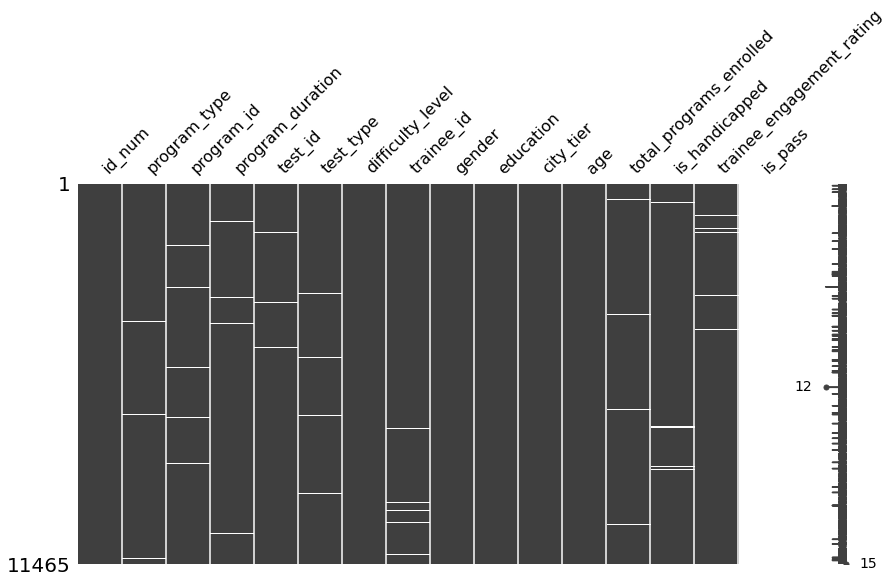

In [10]:
test1 = pd.read_csv("./test2.csv")
test1.head(10)
test1['age']=test1['age'].fillna(test1['age'].mean())

test1.loc[test1['gender'] == 'M', 'gender'] = 1 # 将gender中的“M”“F”转换成值
test1.loc[test1['gender'] == 'F', 'gender'] = 10 

test1.loc[test1['education'] == 'Matriculation', 'education'] = 1 # 将edu中的学历转换成值
test1.loc[test1['education'] == 'High School Diploma', 'education'] = 4 
test1.loc[test1['education'] == 'Bachelors', 'education'] = 7 
test1.loc[test1['education'] == 'Masters', 'education'] = 10 
test1.loc[test1['education'] == 'No Qualification', 'education'] = 0 

test1.loc[test1['difficulty_level'] == 'easy', 'difficulty_level'] = 0 #同样的，将level转换
test1.loc[test1['difficulty_level'] == 'intermediate', 'difficulty_level'] = 2
test1.loc[test1['difficulty_level'] == 'hard', 'difficulty_level'] = 4
test1.loc[test1['difficulty_level'] == 'vary hard', 'difficulty_level'] = 6

test1['age']=test1['age'].fillna(test1['age'].mean())
test1['gender']=test1['gender'].fillna(test1['gender'].mean())
test1['education']=test1['education'].fillna(test1['education'].mean())
test1['difficulty_level']=test1['difficulty_level'].fillna(test1['difficulty_level'].mean())
test1['city_tier']=test1['city_tier'].fillna(test1['city_tier'].mean())
msno.matrix(test1,figsize=(14,7))

# 文件输出

In [11]:
test1_target=alg.predict(test1[predictors])
print(test1_target)
test1_target[test1_target>0.5]=1
test1_target[test1_target<=0.5]=0
print(test1_target)

[0.72755196 0.64179646 0.64869215 ... 0.64179646 0.58068947 0.7152277 ]
[1. 1. 1. ... 1. 1. 1.]


In [12]:
sub=pd.read_csv("./submission2.csv")
print (sub)
sub['is_pass']=test1_target
sub.rename_axis(index='')
print(sub)
sub.to_csv("./submission3.csv",index=None)

          id_num  is_pass
0        4753_31        0
1      10816_148        0
2       7498_114        0
3      14139_175        0
4       11305_25        0
...          ...      ...
11460   1612_108        0
11461   17726_44        0
11462   8272_131        0
11463  10621_166        0
11464    2465_48        0

[11465 rows x 2 columns]


,id_num,is_pass
,,
0,4753_31,1.0
1,10816_148,1.0
2,7498_114,1.0
3,14139_175,1.0
4,11305_25,1.0
...,...,...
11460,1612_108,1.0
11461,17726_44,1.0
11462,8272_131,1.0


          id_num  is_pass
0        4753_31      1.0
1      10816_148      1.0
2       7498_114      1.0
3      14139_175      1.0
4       11305_25      1.0
...          ...      ...
11460   1612_108      1.0
11461   17726_44      1.0
11462   8272_131      1.0
11463  10621_166      1.0
11464    2465_48      1.0

[11465 rows x 2 columns]
